In [51]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from config import *
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import numpy as np
import seaborn as sns

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [10]:
# Set the news list
targets = ['BBC', 'CBS', 'CNN', 'FoxNews', 'nytimes']

In [81]:
total_mood = []

for target in targets:
    
    last_tweet = None
    
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    
    tweet_counter = 1
    
    for x in range(5):
        
        all_data = api.user_timeline(target, count=20, max_id=last_tweet, page=x)
        
        for tweet in all_data:
            
            emotions = analyzer.polarity_scores(tweet['text'])
            
            total_mood.append({'user': target,
                            'compound': emotions['compound'],
                             'positive': emotions['pos'],
                             'negative': emotions['neg'],
                             'neutral': emotions['neu'],
                             'tweets_ago': tweet_counter})
            
            
            compound_list.append(emotions['compound'])
            positive_list.append(emotions['pos'])
            negative_list.append(emotions['neg'])
            neutral_list.append(emotions['neu'])
            tweets_ago = tweet_counter
            
            tweet_counter += 1
        
    
    
        last_tweet = tweet["id"] - 1
        
    #total_emo = {'user': target,
            #'compound': np.mean(compound_list),
            #'positive': np.mean(positive_list),
            #'negative': np.mean(negative_list),
            #'neutral': np.mean(neutral_list),
            #'tweet_count': len(compound_list)}
    
    #total_mood.append(total_emo)    
    
tweet['id']

979920008569610241

In [39]:
len(all_data)

5

In [40]:
compound_list

[0.0, -0.0865, 0.5719, 0.765, 0.0]

In [41]:
emotions

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [44]:
total_mood

[{'compound': 0.22754000000000002,
  'negative': 0.0666,
  'neutral': 0.752,
  'positive': 0.1814,
  'tweet_count': 5,
  'user': 'BBC'},
 {'compound': 0.31222,
  'negative': 0.0,
  'neutral': 0.9116,
  'positive': 0.0884,
  'tweet_count': 5,
  'user': 'CBS'},
 {'compound': 0.1631,
  'negative': 0.057999999999999996,
  'neutral': 0.8298,
  'positive': 0.11199999999999999,
  'tweet_count': 5,
  'user': 'CNN'},
 {'compound': -0.07038,
  'negative': 0.10400000000000001,
  'neutral': 0.8048,
  'positive': 0.091,
  'tweet_count': 5,
  'user': 'FoxNews'},
 {'compound': 0.25007999999999997,
  'negative': 0.0256,
  'neutral': 0.8674,
  'positive': 0.10700000000000001,
  'tweet_count': 5,
  'user': 'nytimes'}]

In [82]:
df = pd.DataFrame(total_mood)
df.describe()

,compound,negative,neutral,positive,tweets_ago
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.081733,0.065356,0.836766,0.097866,50.500000
std,0.437702,0.115250,0.147914,0.128690,28.894979
min,-0.952400,0.000000,0.265000,0.000000,1.000000
25%,-0.151600,0.000000,0.744000,0.000000,25.750000
50%,0.000000,0.000000,0.849000,0.000000,50.500000
75%,0.421500,0.114000,1.000000,0.180250,75.250000
max,0.945100,0.735000,1.000000,0.712000,100.000000


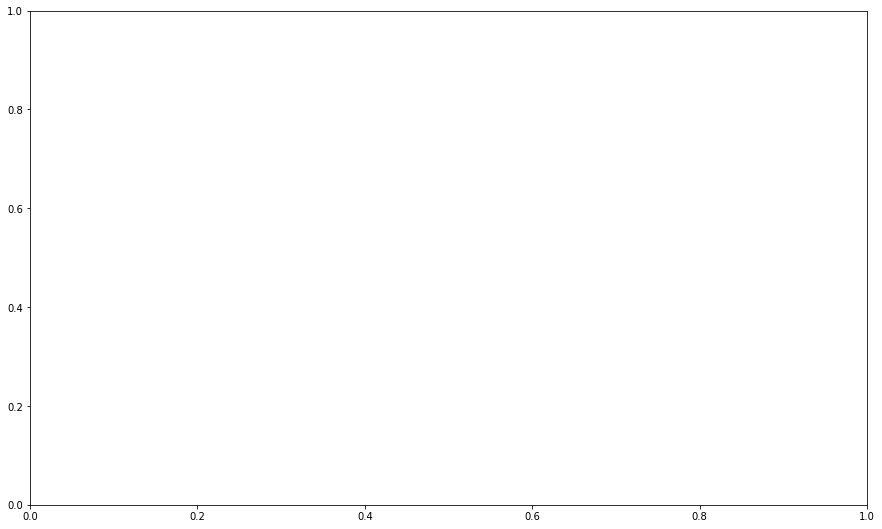

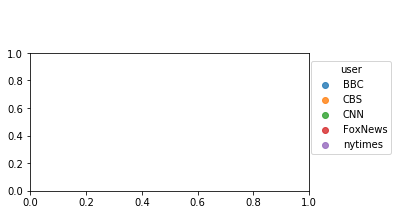

In [78]:
plt.figure(figsize=(15,20))
g = plt.subplot(2,1,1)
g = sns.lmplot(x='tweets_ago', y='compound', data=df, hue="user", fit_reg=False, scatter=True)
plt.subplot(2,1,2)
#sns.FacetGrid(df, 'tweets_ago', 'compound',  hue_kws={"marker": ["^", "v", 'o', 'D', '+']})
#pl.map(plt.scatter,  s=100, linewidth=.5, edgecolor="white")

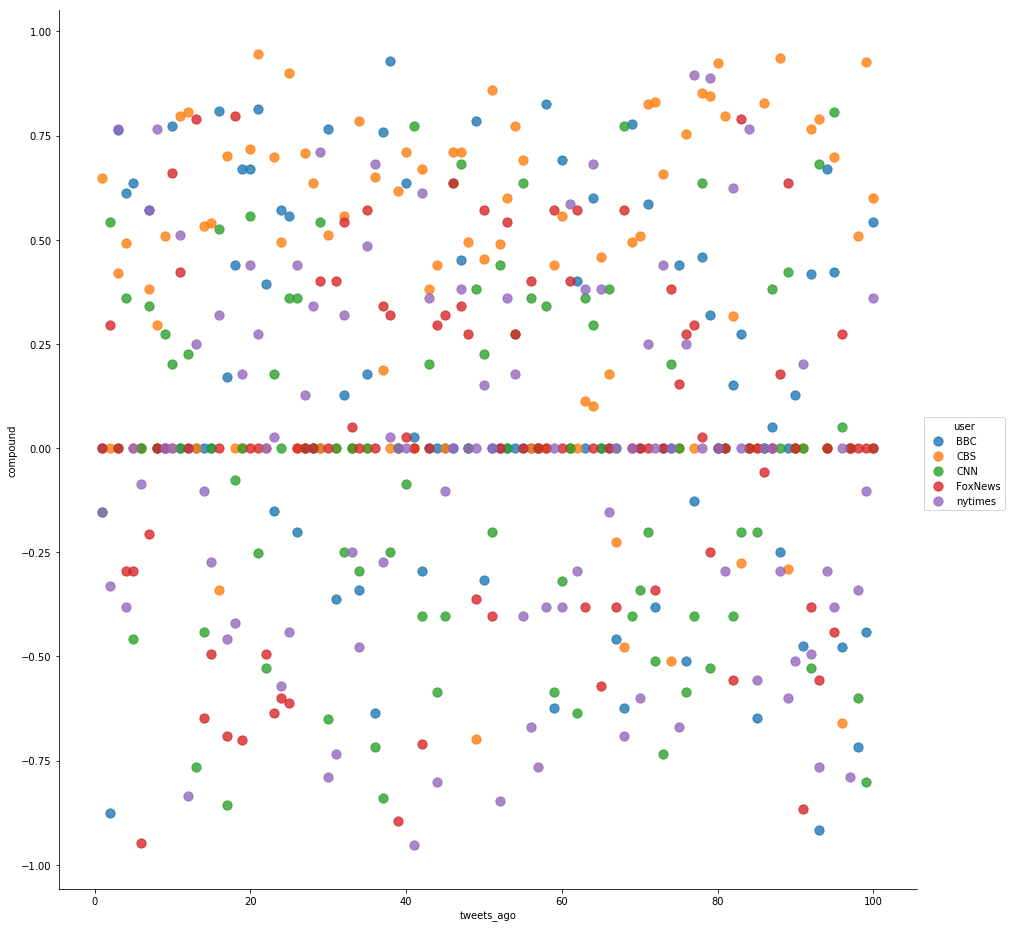

In [91]:
sns.lmplot(x='tweets_ago', y='compound', data=df, hue="user", fit_reg=False, scatter=True, size=13,
           scatter_kws={"s":85})